In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
col_names = [
    "ID", "Label", "Statement", "Subject(s)", "Speaker", 
    "Speaker Job Title", "State Info", "Party Affiliation", "Barely True Counts",
    "False Counts", "Half True Counts", "Mostly True Counts", "Pants on Fire Counts", 
    "Context"
]

datasets = ['train', 'valid', 'test']
folder_path = "./Data/"

dataframes = {}

for dataset in datasets:
    dataframes[dataset] = pd.read_csv(
        f"{folder_path}{dataset}.tsv",
        sep="\t",
        header=None,
    )

    dataframes[dataset].columns = col_names

train_df : pd.DataFrame = dataframes["train"]
valid_df : pd.DataFrame = dataframes["valid"]
test_df : pd.DataFrame  = dataframes["test"]


In [41]:
print('Train null values:\n', train_df.isnull().sum())
print('Test null values:\n', test_df.isnull().sum())
print('Valid null values:\n', valid_df.isnull().sum())

Train null values:
 ID                         0
Label                      0
Statement                  0
Subject(s)                 2
Speaker                    2
Speaker Job Title       2898
State Info              2210
Party Affiliation          2
Barely True Counts         2
False Counts               2
Half True Counts           2
Mostly True Counts         2
Pants on Fire Counts       2
Context                  102
dtype: int64
Test null values:
 ID                        0
Label                     0
Statement                 0
Subject(s)                0
Speaker                   0
Speaker Job Title       325
State Info              262
Party Affiliation         0
Barely True Counts        0
False Counts              0
Half True Counts          0
Mostly True Counts        0
Pants on Fire Counts      0
Context                  17
dtype: int64
Valid null values:
 ID                        0
Label                     0
Statement                 0
Subject(s)                0
Speak

In [42]:
cat_cols = [
    "Speaker", 
    "Party Affiliation", 
    "Speaker Job Title", 
    "State Info", 
    "Subject(s)", 
    "Context"
]

num_cols = [
    "Barely True Counts", 
    "False Counts", 
    "Half True Counts", 
    "Mostly True Counts", 
    "Pants on Fire Counts"
]

for df in [train_df]:
    for col in cat_cols:
        df[col] = df[col].fillna(f"unknown_{col.lower().replace(' ', '_')}")
    
    for col in num_cols:
        df[col] = df[col].fillna(0)

print('After handling null values:', train_df.isnull().sum().sum())

After handling null values: 0


In [43]:
print("Train shape:", train_df.shape)
print("Valid shape:", valid_df.shape)
print("Test shape:", test_df.shape)

print("\nTrain Info:")
print(train_df.info())

print("\nFirst few rows of Train:")
print(train_df.head())

print("\nNumber of missing values in Train:")
print(train_df.isnull().sum())

Train shape: (10240, 14)
Valid shape: (1284, 14)
Test shape: (1267, 14)

Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10240 non-null  object 
 1   Label                 10240 non-null  object 
 2   Statement             10240 non-null  object 
 3   Subject(s)            10240 non-null  object 
 4   Speaker               10240 non-null  object 
 5   Speaker Job Title     10240 non-null  object 
 6   State Info            10240 non-null  object 
 7   Party Affiliation     10240 non-null  object 
 8   Barely True Counts    10240 non-null  float64
 9   False Counts          10240 non-null  float64
 10  Half True Counts      10240 non-null  float64
 11  Mostly True Counts    10240 non-null  float64
 12  Pants on Fire Counts  10240 non-null  float64
 13  Context               10240 non-null

In [44]:
train_df["Label"] = train_df["Label"].str.strip()
valid_df["Label"] = valid_df["Label"].str.strip()
test_df["Label"]  = test_df["Label"].str.strip()

print(train_df["Label"].value_counts())

Label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64


Label counts:
 Label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64

Label percentages:
 Label
half-true      20.64
false          19.48
mostly-true    19.16
true           16.37
barely-true    16.15
pants-fire      8.19
Name: proportion, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4128\3007643399.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label", data=train_df, order=label_counts.index, palette="viridis")


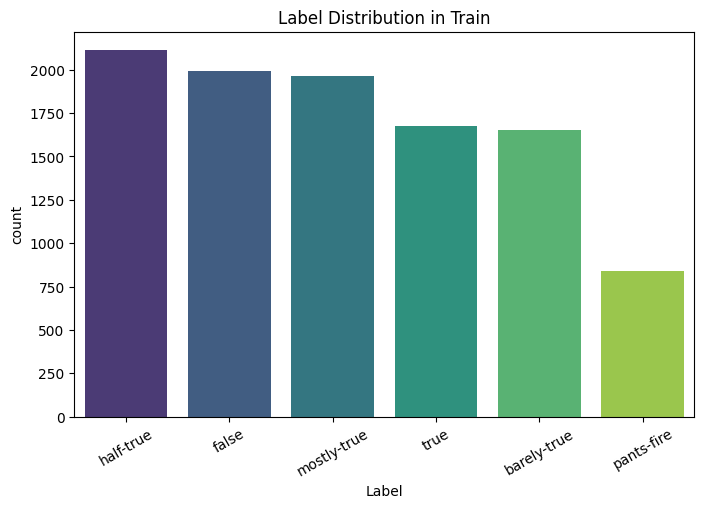

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4128\3007643399.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_percent.index, y=label_percent.values, palette="viridis")


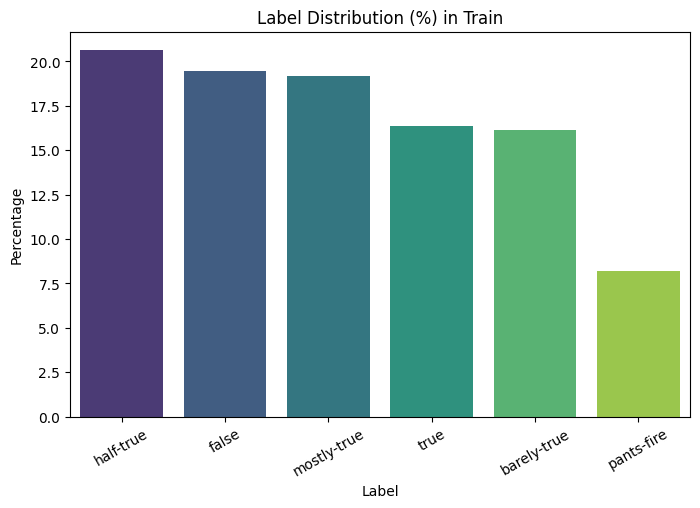

In [45]:
label_counts = train_df["Label"].value_counts()
label_percent = train_df["Label"].value_counts(normalize=True) * 100

print("Label counts:\n", label_counts)
print("\nLabel percentages:\n", label_percent.round(2))

plt.figure(figsize=(8,5))
sns.countplot(x="Label", data=train_df, order=label_counts.index, palette="viridis")
plt.title("Label Distribution in Train")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=label_percent.index, y=label_percent.values, palette="viridis")
plt.title("Label Distribution (%) in Train")
plt.ylabel("Percentage")
plt.xticks(rotation=30)
plt.show()


Statement length stats:
           char_len      word_len
count  10240.000000  10240.000000
mean     106.918750     18.010059
std       59.917722      9.658572
min       11.000000      2.000000
25%       73.000000     12.000000
50%       99.000000     17.000000
75%      132.250000     22.000000
max     3192.000000    467.000000


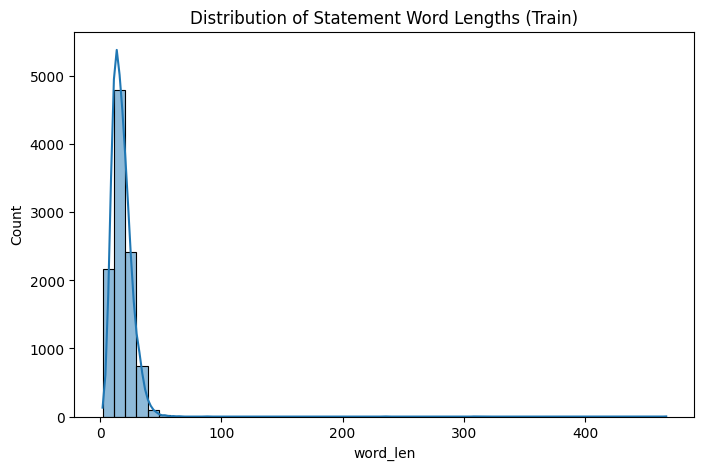

In [46]:
train_df["char_len"] = train_df["Statement"].astype(str).apply(len)
train_df["word_len"] = train_df["Statement"].astype(str).apply(lambda x: len(x.split()))

print("\nStatement length stats:")
print(train_df[["char_len", "word_len"]].describe())

plt.figure(figsize=(8,5))
sns.histplot(train_df["word_len"], bins=50, kde=True)
plt.title("Distribution of Statement Word Lengths (Train)")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4128\4228374601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="word_len", data=train_df, palette="viridis")


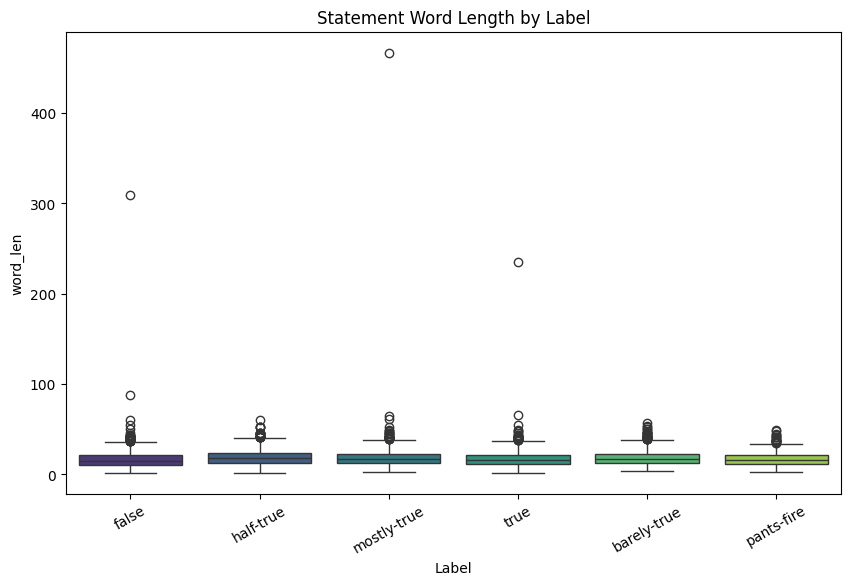

Average word length per label:
 Label
false          16.985464
pants-fire     17.131108
true           18.015513
barely-true    18.158404
mostly-true    18.452599
half-true      18.794702
Name: word_len, dtype: float64


In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Label", y="word_len", data=train_df, palette="viridis")
plt.title("Statement Word Length by Label")
plt.xticks(rotation=30)
plt.show()

avg_len_per_label = train_df.groupby("Label")["word_len"].mean().sort_values()
print("Average word length per label:\n", avg_len_per_label)

Top 15 Speakers:
 Speaker
barack-obama       488
donald-trump       273
hillary-clinton    239
mitt-romney        176
scott-walker       149
john-mccain        148
chain-email        142
rick-perry         142
marco-rubio        117
rick-scott         115
ted-cruz            93
bernie-s            88
chris-christie      78
facebook-posts      78
charlie-crist       70
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4128\2231913815.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_speakers.values, y=top_speakers.index, palette="viridis")


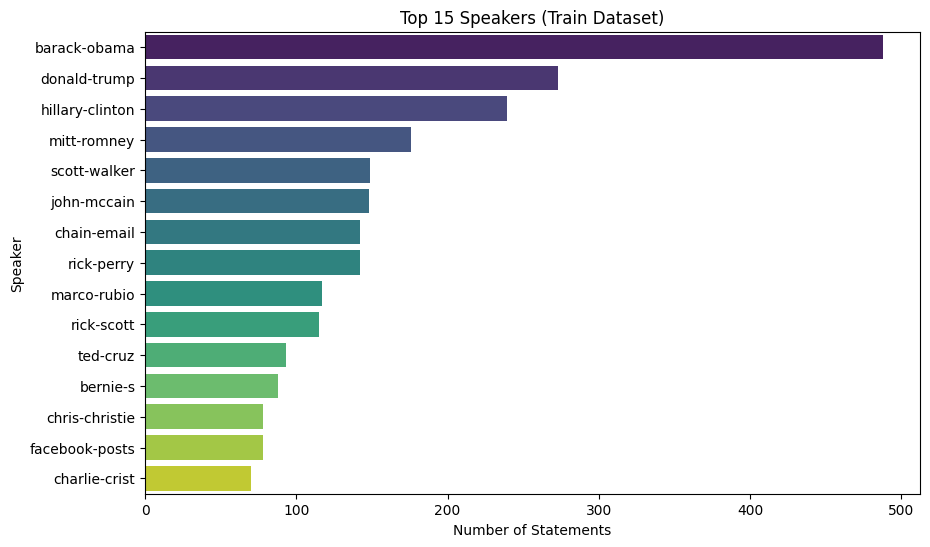

In [48]:
top_speakers = train_df["Speaker"].value_counts().head(15)
print("Top 15 Speakers:\n", top_speakers)

plt.figure(figsize=(10,6))
sns.barplot(x=top_speakers.values, y=top_speakers.index, palette="viridis")
plt.title("Top 15 Speakers (Train Dataset)")
plt.xlabel("Number of Statements")
plt.ylabel("Speaker")
plt.show()

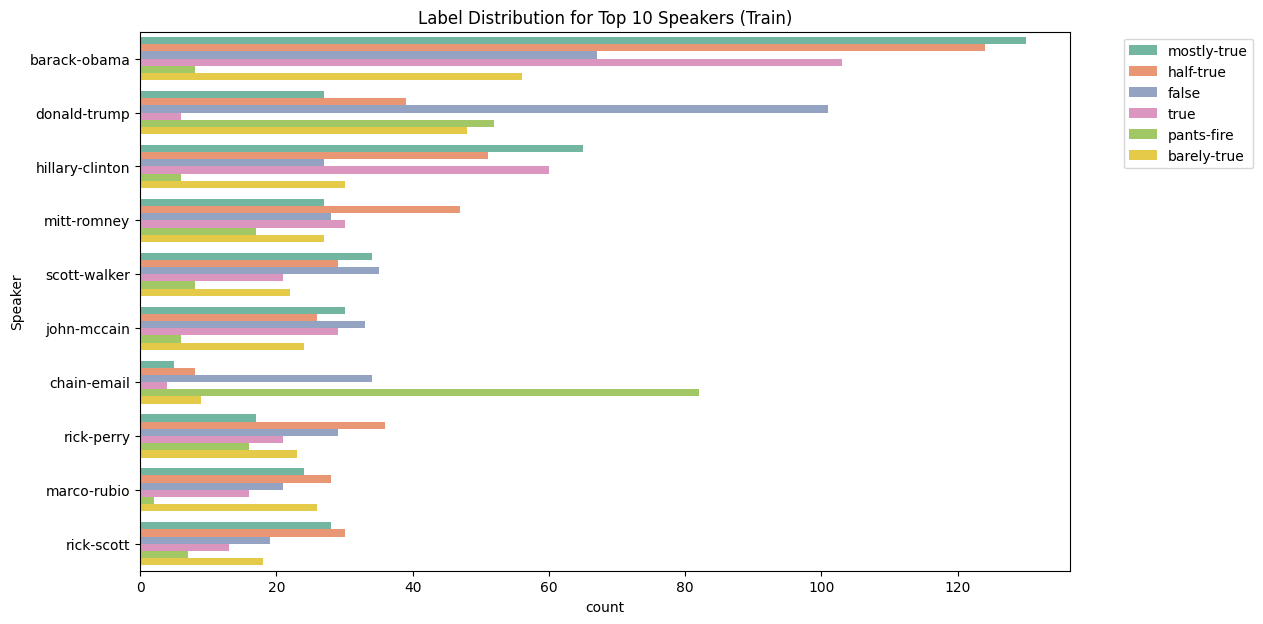

In [49]:
top_10_speakers = train_df["Speaker"].value_counts().head(10).index
speaker_label_dist = train_df[train_df["Speaker"].isin(top_10_speakers)]

plt.figure(figsize=(12,7))
sns.countplot(data=speaker_label_dist, y="Speaker", hue="Label", order=top_10_speakers, palette="Set2")
plt.title("Label Distribution for Top 10 Speakers (Train)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [50]:
speaker_truth_ratio = (
    train_df.groupby(["Speaker", "Label"]).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack()
    .fillna(0)
)

print("Label percentage distribution per speaker (sample):")
display(speaker_truth_ratio.head(10))

Label percentage distribution per speaker (sample):


,Label,barely-true,false,half-true,mostly-true,pants-fire,true
Speaker,Speaker,,,,,,
18-percent-american-public,18-percent-american-public,0.0,0.0,0.0,0.0,50.0,50.0
60-plus-association,60-plus-association,50.0,0.0,0.0,0.0,50.0,0.0
AARP,AARP,0.0,0.0,0.0,100.0,0.0,0.0
Arizona-Citizens-Defense-League,Arizona-Citizens-Defense-League,0.0,50.0,50.0,0.0,0.0,0.0
Ballesteros,Ballesteros,100.0,0.0,0.0,0.0,0.0,0.0
Coast-Guard,Coast-Guard,0.0,0.0,0.0,100.0,0.0,0.0
GaGOP,GaGOP,50.0,25.0,25.0,0.0,0.0,0.0
Kiplinger-com,Kiplinger-com,0.0,0.0,100.0,0.0,0.0,0.0
Yes-on-79,Yes-on-79,0.0,0.0,100.0,0.0,0.0,0.0


Top 15 Party Affiliations:
 Party Affiliation
republican          4497
democrat            3336
none                1744
organization         219
independent          147
newsmaker             56
libertarian           40
activist              39
journalist            38
columnist             35
talk-show-host        26
state-official        20
labor-leader          11
tea-party-member      10
business-leader        9
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4128\3831182261.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_counts.values, y=party_counts.index, palette="mako")


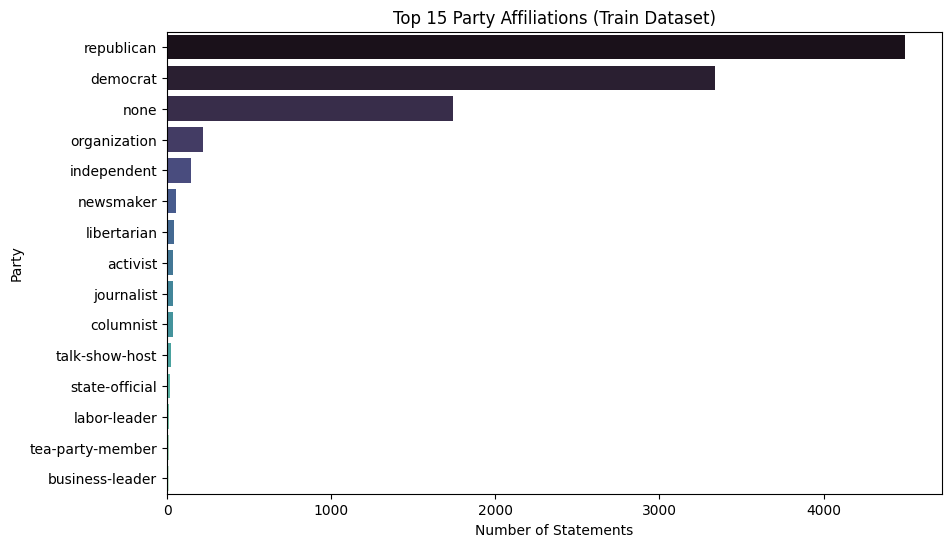

In [51]:
party_counts = train_df["Party Affiliation"].value_counts().head(15)
print("Top 15 Party Affiliations:\n", party_counts)

plt.figure(figsize=(10,6))
sns.barplot(x=party_counts.values, y=party_counts.index, palette="mako")
plt.title("Top 15 Party Affiliations (Train Dataset)")
plt.xlabel("Number of Statements")
plt.ylabel("Party")
plt.show()

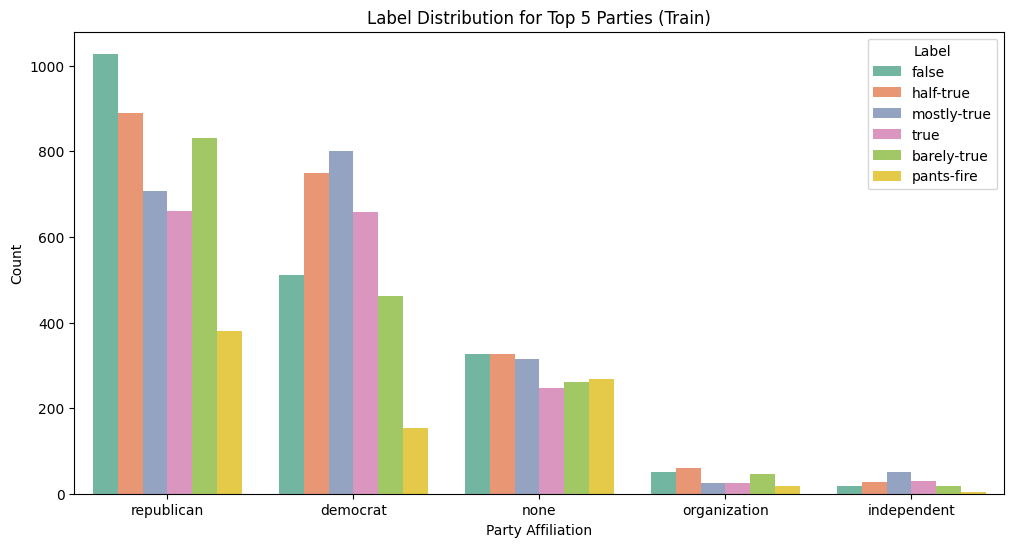

In [52]:
top_5_parties = train_df["Party Affiliation"].value_counts().head(5).index
party_label_dist = train_df[train_df["Party Affiliation"].isin(top_5_parties)]

plt.figure(figsize=(12,6))
sns.countplot(data=party_label_dist, x="Party Affiliation", hue="Label", order=top_5_parties, palette="Set2")
plt.title("Label Distribution for Top 5 Parties (Train)")
plt.ylabel("Count")
plt.show()

In [53]:
party_truth_ratio = (
    train_df.groupby(["Party Affiliation", "Label"]).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack()
    .fillna(0)
)

print("Label percentage distribution per party (sample):")
display(party_truth_ratio.head(10))

Label percentage distribution per party (sample):


,Label,barely-true,false,half-true,mostly-true,pants-fire,true
Party Affiliation,Party Affiliation,,,,,,
Moderate,Moderate,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
activist,activist,17.948718,17.948718,23.076923,28.205128,0.000000,12.820513
business-leader,business-leader,0.000000,11.111111,0.000000,11.111111,22.222222,55.555556
columnist,columnist,14.285714,28.571429,8.571429,14.285714,2.857143,31.428571
constitution-party,constitution-party,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
democrat,democrat,13.878897,15.317746,22.482014,24.010791,4.586331,19.724221
democratic-farmer-labor,democratic-farmer-labor,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
education-official,education-official,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
government-body,government-body,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000


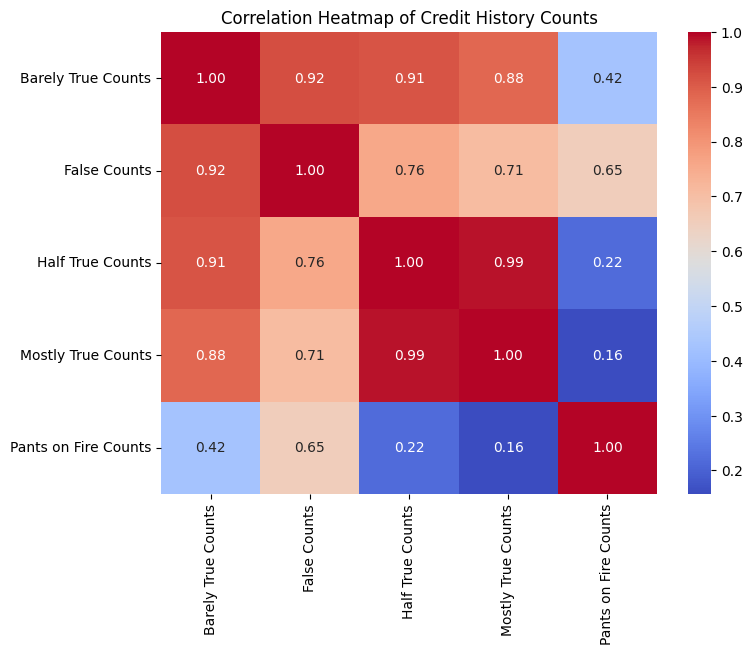

In [54]:
credit_cols = ["Barely True Counts", "False Counts", "Half True Counts", 
               "Mostly True Counts", "Pants on Fire Counts"]

corr = train_df[credit_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Credit History Counts")
plt.show()

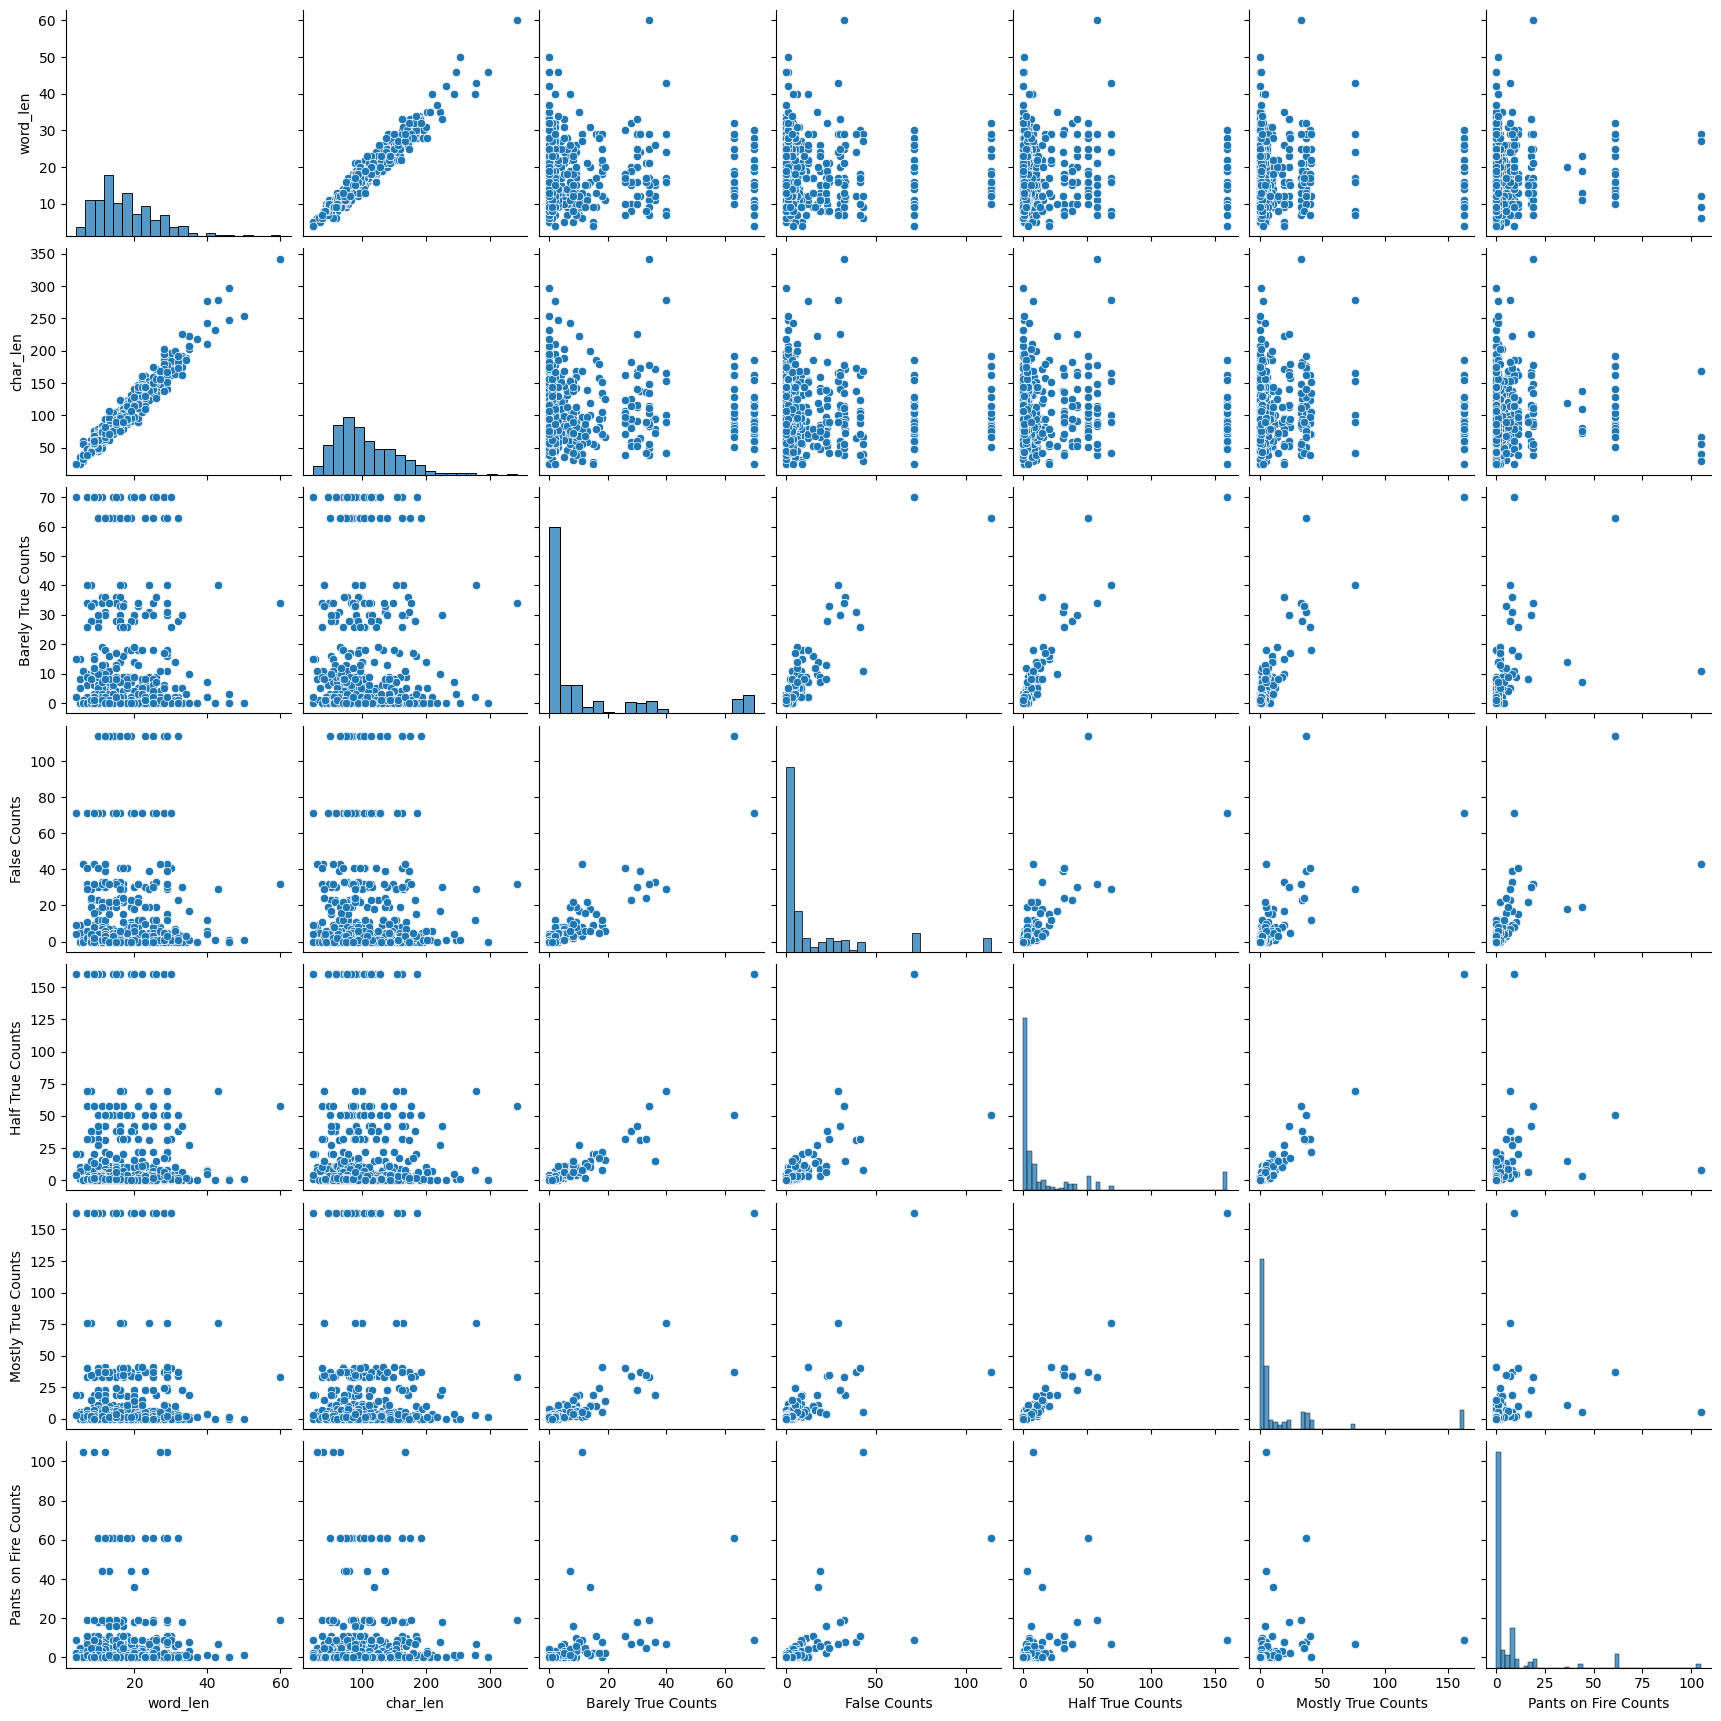

In [55]:
pairplot_df = train_df[["word_len", "char_len"] + credit_cols].sample(500, random_state=42)  

sns.pairplot(pairplot_df)
plt.show()

In [56]:
def add_features(df):
    df["char_count"] = df["Statement"].apply(len)
    df["word_count"] = df["Statement"].apply(lambda x: len(str(x).split()))
    df["avg_word_length"] = df["Statement"].apply(lambda x: np.mean([len(w) for w in str(x).split()]) if len(str(x).split())>0 else 0)
    df["exclamation_count"] = df["Statement"].apply(lambda x: str(x).count("!"))
    df["question_count"] = df["Statement"].apply(lambda x: str(x).count("?"))
    df["number_count"] = df["Statement"].apply(lambda x: sum(c.isdigit() for c in str(x)))

    total_counts = (
        df["Barely True Counts"] +
        df["False Counts"] +
        df["Half True Counts"] +
        df["Mostly True Counts"] +
        df["Pants on Fire Counts"]
    )
    df["true_ratio"] = (df["Mostly True Counts"]) / (total_counts + 1e-6)
    df["false_ratio"] = (df["False Counts"] + df["Barely True Counts"] + df["Pants on Fire Counts"]) / (total_counts + 1e-6)

    return df

train_df = add_features(train_df)
test_df = add_features(test_df)
valid_df = add_features(valid_df)

In [58]:
datasets = {
    "train": train_df,
    "valid": valid_df,
    "test": test_df
}

for name, df in datasets.items():
    df.to_csv(f'./Data/{name}_clean.csv', index=False)